#  <font color='dark gary'> Pycaret - Anomaly detection method

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager

# <font color='brown'> Lesson 1
# Getting familiar with PyCaret for anomaly detection
- https://www.analyticsvidhya.com/blog/2021/05/getting-familiar-with-pycaret-for-anomaly-detection/
- https://pycaret.readthedocs.io/en/latest/api/anomaly.html

Col1      Col2      Col3      Col4      Col5      Col6      Col7  \
0  0.263995  0.764929  0.138424  0.935242  0.605867  0.518790  0.912225   
1  0.546092  0.653975  0.065575  0.227772  0.845269  0.837066  0.272379   
2  0.336714  0.538842  0.192801  0.553563  0.074515  0.332993  0.365792   
3  0.092108  0.995017  0.014465  0.176371  0.241530  0.514724  0.562208   
4  0.325261  0.805968  0.957033  0.331665  0.307923  0.355315  0.501899   

       Col8      Col9     Col10  
0  0.608234  0.723782  0.733591  
1  0.331679  0.429297  0.367422  
2  0.861309  0.899017  0.088600  
3  0.158963  0.073715  0.208463  
4  0.558449  0.885169  0.182754

array([[<AxesSubplot:title={'center':'Col1'}>,
        <AxesSubplot:title={'center':'Col2'}>,
        <AxesSubplot:title={'center':'Col3'}>],
       [<AxesSubplot:title={'center':'Col4'}>,
        <AxesSubplot:title={'center':'Col5'}>,
        <AxesSubplot:title={'center':'Col6'}>],
       [<AxesSubplot:title={'center':'Col7'}>,
        <AxesSubplot:title={'center':'Col8'}>,
        <AxesSubplot:title={'center':'Col9'}>],
       [<AxesSubplot:title={'center':'Col10'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

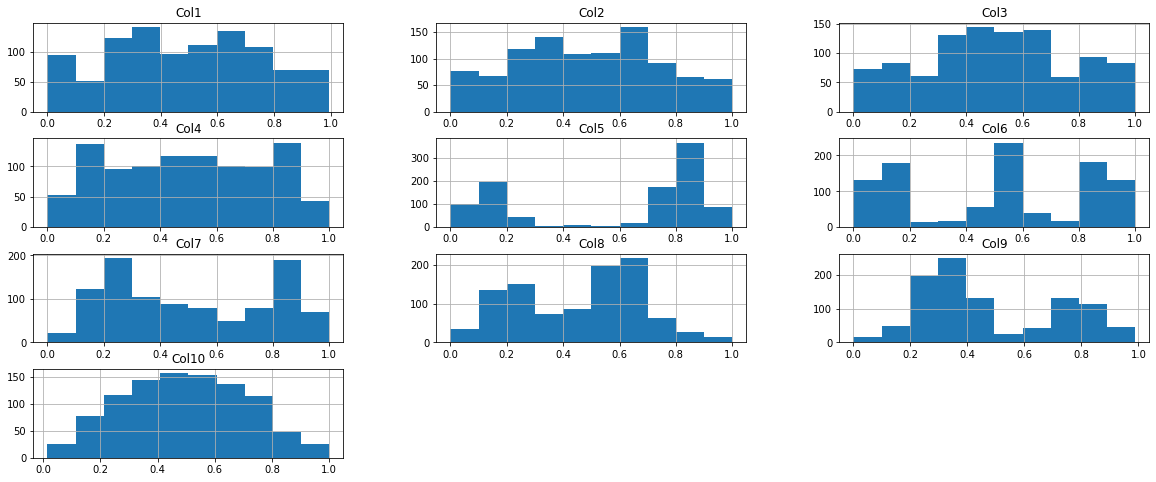

In [7]:
from pycaret.datasets import get_data
df = get_data('anomaly')
df.hist(figsize=(20,8))

In [9]:
from pycaret.anomaly import *
setup = setup(df, session_id = 123)

## Model Creation

In [10]:
models()

Name                    Reference
ID                                                                       
abod            Angle-base Outlier Detection        pyod.models.abod.ABOD
cluster       Clustering-Based Local Outlier      pyod.models.cblof.CBLOF
cof         Connectivity-Based Local Outlier          pyod.models.cof.COF
iforest                     Isolation Forest  pyod.models.iforest.IForest
histogram  Histogram-based Outlier Detection        pyod.models.hbos.HBOS
knn             K-Nearest Neighbors Detector          pyod.models.knn.KNN
lof                     Local Outlier Factor          pyod.models.lof.LOF
svm                   One-class SVM detector      pyod.models.ocsvm.OCSVM
pca             Principal Component Analysis          pyod.models.pca.PCA
mcd           Minimum Covariance Determinant          pyod.models.mcd.MCD
sod               Subspace Outlier Detection          pyod.models.sod.SOD
sos             Stochastic Outlier Selection          pyod.models.sos.SOS

## Comparing anomalies in models
assign_model() function returns a data frame with detection of anomalies, the presence of outliers are marked as 1 and non-outliers as 0, along with anomaly scores.

In [21]:
iforest = create_model('iforest')
iforest_results = assign_model(iforest)

iforest_results.head()
iforest_anomaly=iforest_results[iforest_results['Anomaly']==1]
iforest_anomaly.head()

Col1      Col2      Col3      Col4      Col5      Col6      Col7  \
0  0.263995  0.764929  0.138424  0.935242  0.605867  0.518790  0.912225   
1  0.546092  0.653975  0.065575  0.227772  0.845269  0.837066  0.272379   
2  0.336714  0.538842  0.192801  0.553563  0.074515  0.332993  0.365792   
3  0.092108  0.995017  0.014465  0.176371  0.241530  0.514724  0.562208   
4  0.325261  0.805968  0.957033  0.331665  0.307923  0.355315  0.501899   

       Col8      Col9     Col10  Anomaly  Anomaly_Score  
0  0.608234  0.723782  0.733591        0      -0.035865  
1  0.331679  0.429297  0.367422        0      -0.084927  
2  0.861309  0.899017  0.088600        1       0.025356  
3  0.158963  0.073715  0.208463        1       0.042415  
4  0.558449  0.885169  0.182754        0      -0.023408

Col1      Col2      Col3      Col4      Col5      Col6      Col7  \
2   0.336714  0.538842  0.192801  0.553563  0.074515  0.332993  0.365792   
3   0.092108  0.995017  0.014465  0.176371  0.241530  0.514724  0.562208   
7   0.869237  0.277979  0.423076  0.112472  0.183727  0.034960  0.111114   
8   0.197078  0.843918  0.243396  0.281278  0.329148  0.734582  0.191947   
11  0.796623  0.230543  0.993018  0.077075  0.094068  0.718628  0.977611   

        Col8      Col9     Col10  Anomaly  Anomaly_Score  
2   0.861309  0.899017  0.088600        1       0.025356  
3   0.158963  0.073715  0.208463        1       0.042415  
7   0.249330  0.550683  0.049843        1       0.012853  
8   0.927804  0.713269  0.891548        1       0.033479  
11  0.333386  0.634843  0.028729        1       0.039987

In [22]:
knn = create_model('knn')
lof = create_model('lof')

lof_results = assign_model(lof)
lof_anomaly=lof_results[lof_results['Anomaly']==1]
knn_results = assign_model(knn)
knn_anomaly=knn_results[knn_results['Anomaly']==1]

iforest_anomaly.index
lof_anomaly.index
knn_anomaly.index

Int64Index([  2,   3,   7,   8,  11,  14,  16,  20,  23,  24,  25,  28,  29,
             32,  33,  34,  40,  43,  51,  53,  55,  59,  62,  63,  66,  69,
            198, 545, 577, 602, 680, 700, 701, 703, 704, 707, 708, 713, 716,
            717, 718, 720, 722, 723, 724, 728, 743, 780, 863, 921],
           dtype='int64')

Int64Index([  3,   8,   9,  11,  13,  14,  15,  17,  18,  20,  23,  24,  25,
             28,  29,  32,  33,  35,  36,  41,  43,  45,  46,  48,  51,  53,
             54,  55,  56,  59,  61,  63,  64,  65, 700, 701, 703, 707, 708,
            710, 712, 713, 714, 716, 717, 718, 720, 722, 723, 724],
           dtype='int64')

Int64Index([  2,   3,   8,   9,  11,  13,  14,  15,  17,  18,  20,  23,  24,
             25,  28,  29,  32,  33,  36,  43,  45,  46,  48,  51,  53,  54,
             55,  56,  59,  61,  63,  65, 700, 701, 703, 707, 708, 709, 710,
            712, 713, 714, 716, 717, 718, 720, 722, 723, 724, 725],
           dtype='int64')

In [103]:
pd.DataFrame(data=np.vstack((iforest_anomaly.index, lof_anomaly.index)))

0   1   2   3   4   5   6   7   8   9   ...   40   41   42   43   44   45  \
0   2   3   7   8  11  14  16  20  23  24  ...  718  720  722  723  724  728   
1   3   8   9  11  13  14  15  17  18  20  ...  712  713  714  716  717  718   

    46   47   48   49  
0  743  780  863  921  
1  720  722  723  724  

[2 rows x 50 columns]

In [20]:
evaluate_model(knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Anomaly TSnE (3d)', 'tsn…

## Interpretation and visualization

In [105]:
plot_model(knn)

array([[-17.398819  ,  17.925444  ],
       [ -0.20571971, -24.929781  ],
       [ 22.733759  ,  32.79266   ],
       ...,
       [-32.737347  ,  27.822124  ],
       [ 42.631706  ,  -0.815674  ],
       [ 34.798622  ,  29.409864  ]], dtype=float32)

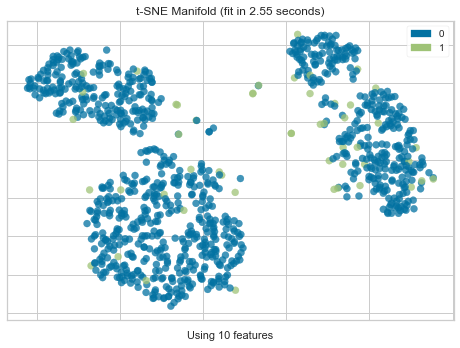

<AxesSubplot:title={'center':'t-SNE Manifold (fit in 2.55 seconds)'}, xlabel='Using 10 features'>

In [23]:
from yellowbrick.features import Manifold
dfr = iforest_results['Anomaly']
viz = Manifold(manifold="tsne")
viz.fit_transform(df, dfr)
viz.show()

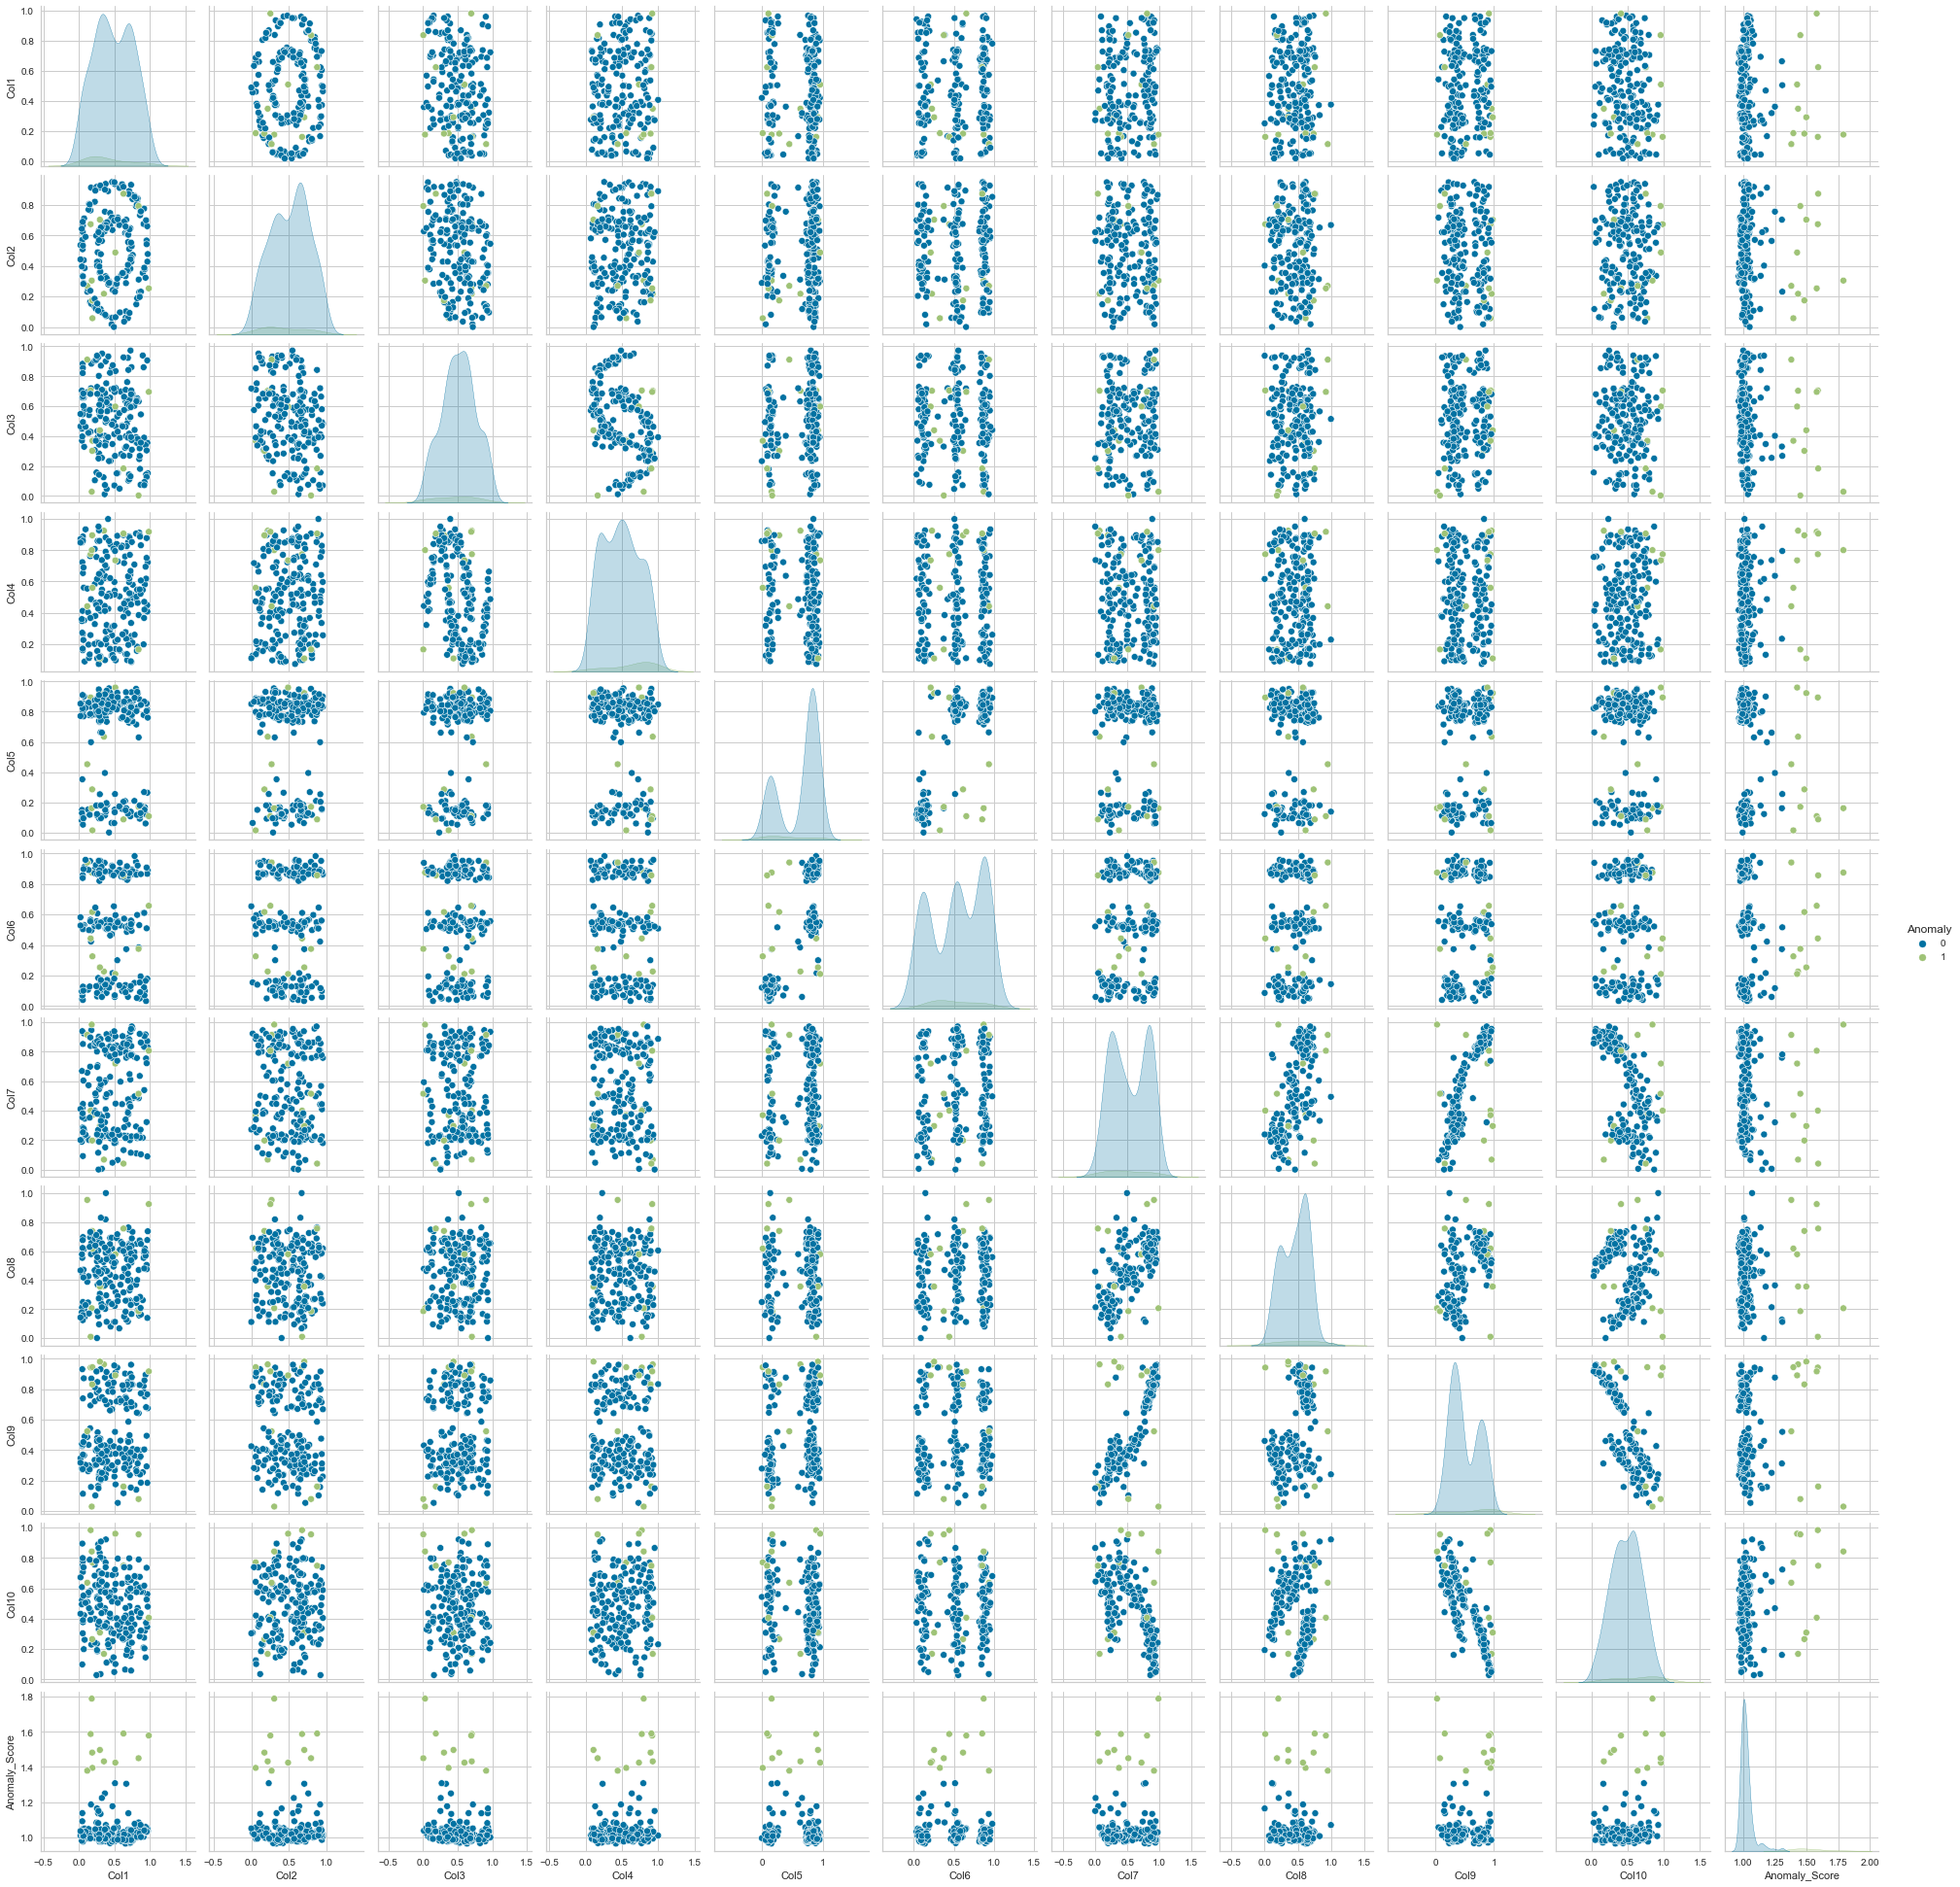

In [108]:
sns.pairplot(lof_results.sample(frac=0.2), hue = "Anomaly")

In [109]:
save_model(iforest,'../output/IForest_Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='UNSUPERVISED_DUMMY_TARGET',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None...
                 ('fix_perfect', 'passthrough'),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  IFo

# End

## 단량 및 다변량 이상치 분석_case study

In [113]:
from pyod.models.mad import MAD
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from sklearn.ensemble import IsolationForest

## Col1 + COl2의 이상치 분석

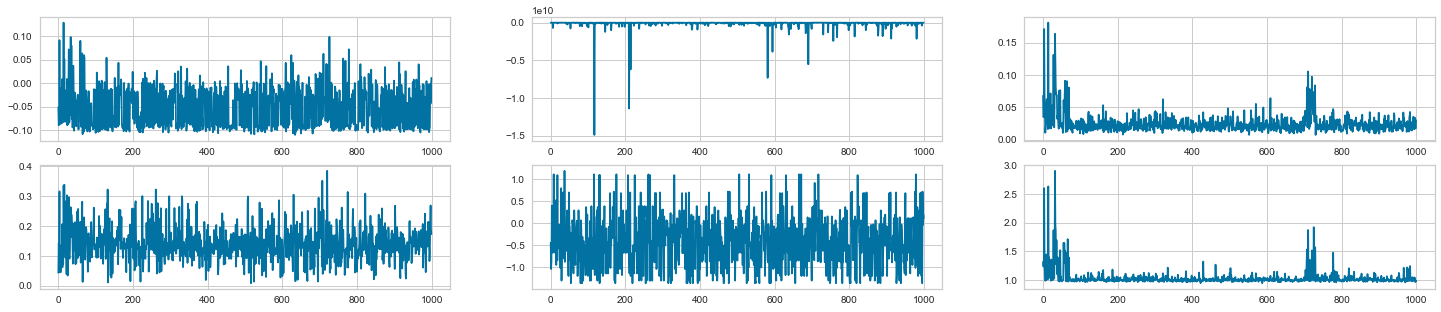

In [130]:
from pyod.models.abod import ABOD
from pyod.models.knn import KNN
from pyod.models.iforest import IForest
from pyod.models.cblof import CBLOF
from pyod.models.hbos import HBOS
from pyod.models.lof import LOF

data = df[['Col1', 'Col2']]
fig, ax = plt.subplots(2, 3, figsize=(25,5))
ax[0][0].plot(IForest(contamination=0.1).fit(data).decision_function(data))
ax[0][1].plot(ABOD(contamination=0.1).fit(data).decision_function(data))
ax[0][2].plot(KNN(contamination=0.1).fit(data).decision_function(data))
ax[1][0].plot(CBLOF(contamination=0.1).fit(data).decision_function(data))
ax[1][1].plot(HBOS(contamination=0.1).fit(data).decision_function(data))
ax[1][2].plot(LOF(contamination=0.1).fit(data).decision_function(data))

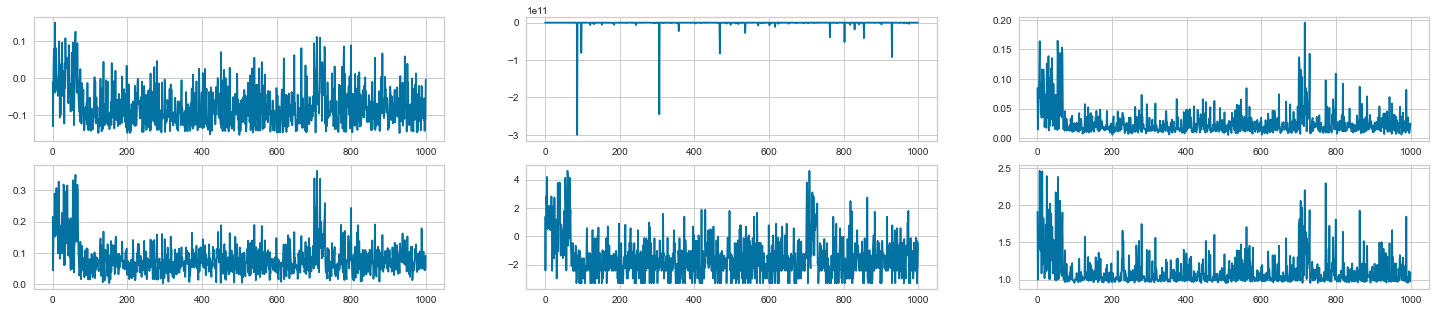

In [132]:
data = df[['Col5', 'Col9']]
fig, ax = plt.subplots(2, 3, figsize=(25,5))
ax[0][0].plot(IForest(contamination=0.1).fit(data).decision_function(data))
ax[0][1].plot(ABOD(contamination=0.1).fit(data).decision_function(data))
ax[0][2].plot(KNN(contamination=0.1).fit(data).decision_function(data))
ax[1][0].plot(CBLOF(contamination=0.1).fit(data).decision_function(data))
ax[1][1].plot(HBOS(contamination=0.1).fit(data).decision_function(data))
ax[1][2].plot(LOF(contamination=0.1).fit(data).decision_function(data))

In [13]:
df.describe()
df.info()

Col1         Col2         Col3         Col4         Col5  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.491362     0.490200     0.509077     0.497362     0.586120   
std       0.259138     0.251931     0.256606     0.263562     0.334658   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.287458     0.291449     0.337802     0.256147     0.169680   
50%       0.492070     0.488656     0.510077     0.497537     0.782019   
75%       0.694192     0.686531     0.686914     0.731949     0.847956   
max       0.994431     1.000000     1.000000     1.000000     1.000000   

              Col6         Col7         Col8         Col9        Col10  
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  
mean      0.514636     0.508270     0.457541     0.477685     0.495760  
std       0.317470     0.278483     0.220129     0.241432     0.211677  
min       0.000000     0.000000     0.000000     0.000000     0.014495  
25%       0.142587     0.246021     0.245539     0.291452     0.329904  
50%       0.537953     0.465679     0.515619     0.387753     0.488891  
75%       0.856512     0.804935     0.626757     0.723674     0.659528  
max       1.000000     1.000000     1.000000     0.988732     1.000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Col1    1000 non-null   float64
 1   Col2    1000 non-null   float64
 2   Col3    1000 non-null   float64
 3   Col4    1000 non-null   float64
 4   Col5    1000 non-null   float64
 5   Col6    1000 non-null   float64
 6   Col7    1000 non-null   float64
 7   Col8    1000 non-null   float64
 8   Col9    1000 non-null   float64
 9   Col10   1000 non-null   float64
dtypes: float64(10)
memory usage: 78.2 KB


In [18]:
pd.melt(df)

variable     value
0        Col1  0.263995
1        Col1  0.546092
2        Col1  0.336714
3        Col1  0.092108
4        Col1  0.325261
...       ...       ...
9995    Col10  0.242762
9996    Col10  0.671129
9997    Col10  0.234952
9998    Col10  0.538755
9999    Col10  0.307592

[10000 rows x 2 columns]

<AxesSubplot:xlabel='variable', ylabel='value'>

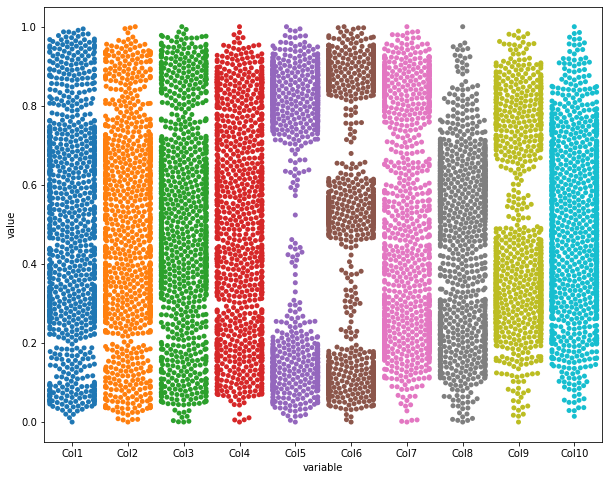

In [16]:
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,8)
sns.swarmplot(x="variable", y="value", data=pd.melt(df))
plt.show()

<AxesSubplot:xlabel='variable', ylabel='value'>

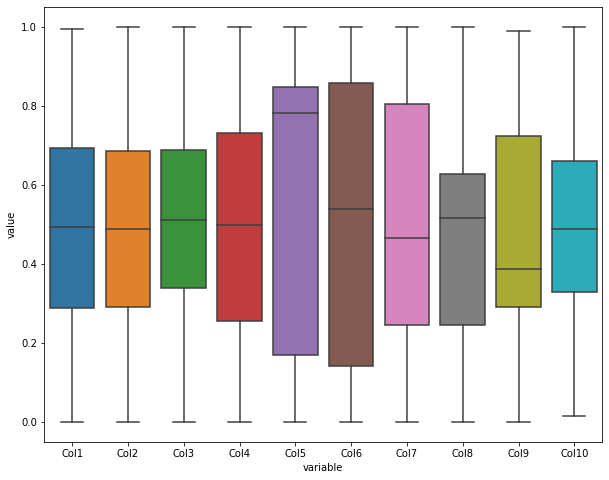

In [19]:
sns.boxplot(x="variable", y="value", data=pd.melt(df))
plt.show()

<AxesSubplot:xlabel='Col1', ylabel='Col2'>

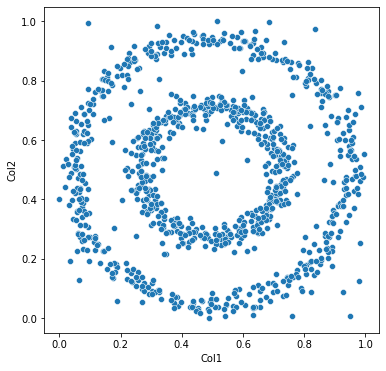

<AxesSubplot:xlabel='Col3', ylabel='Col4'>

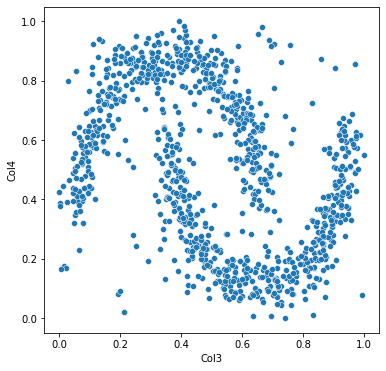

In [39]:
plt.rcParams["figure.figsize"] = (6,6)
sns.scatterplot(data=df, x="Col1", y='Col2'); plt.show()
sns.scatterplot(data=df, x="Col3", y='Col4')

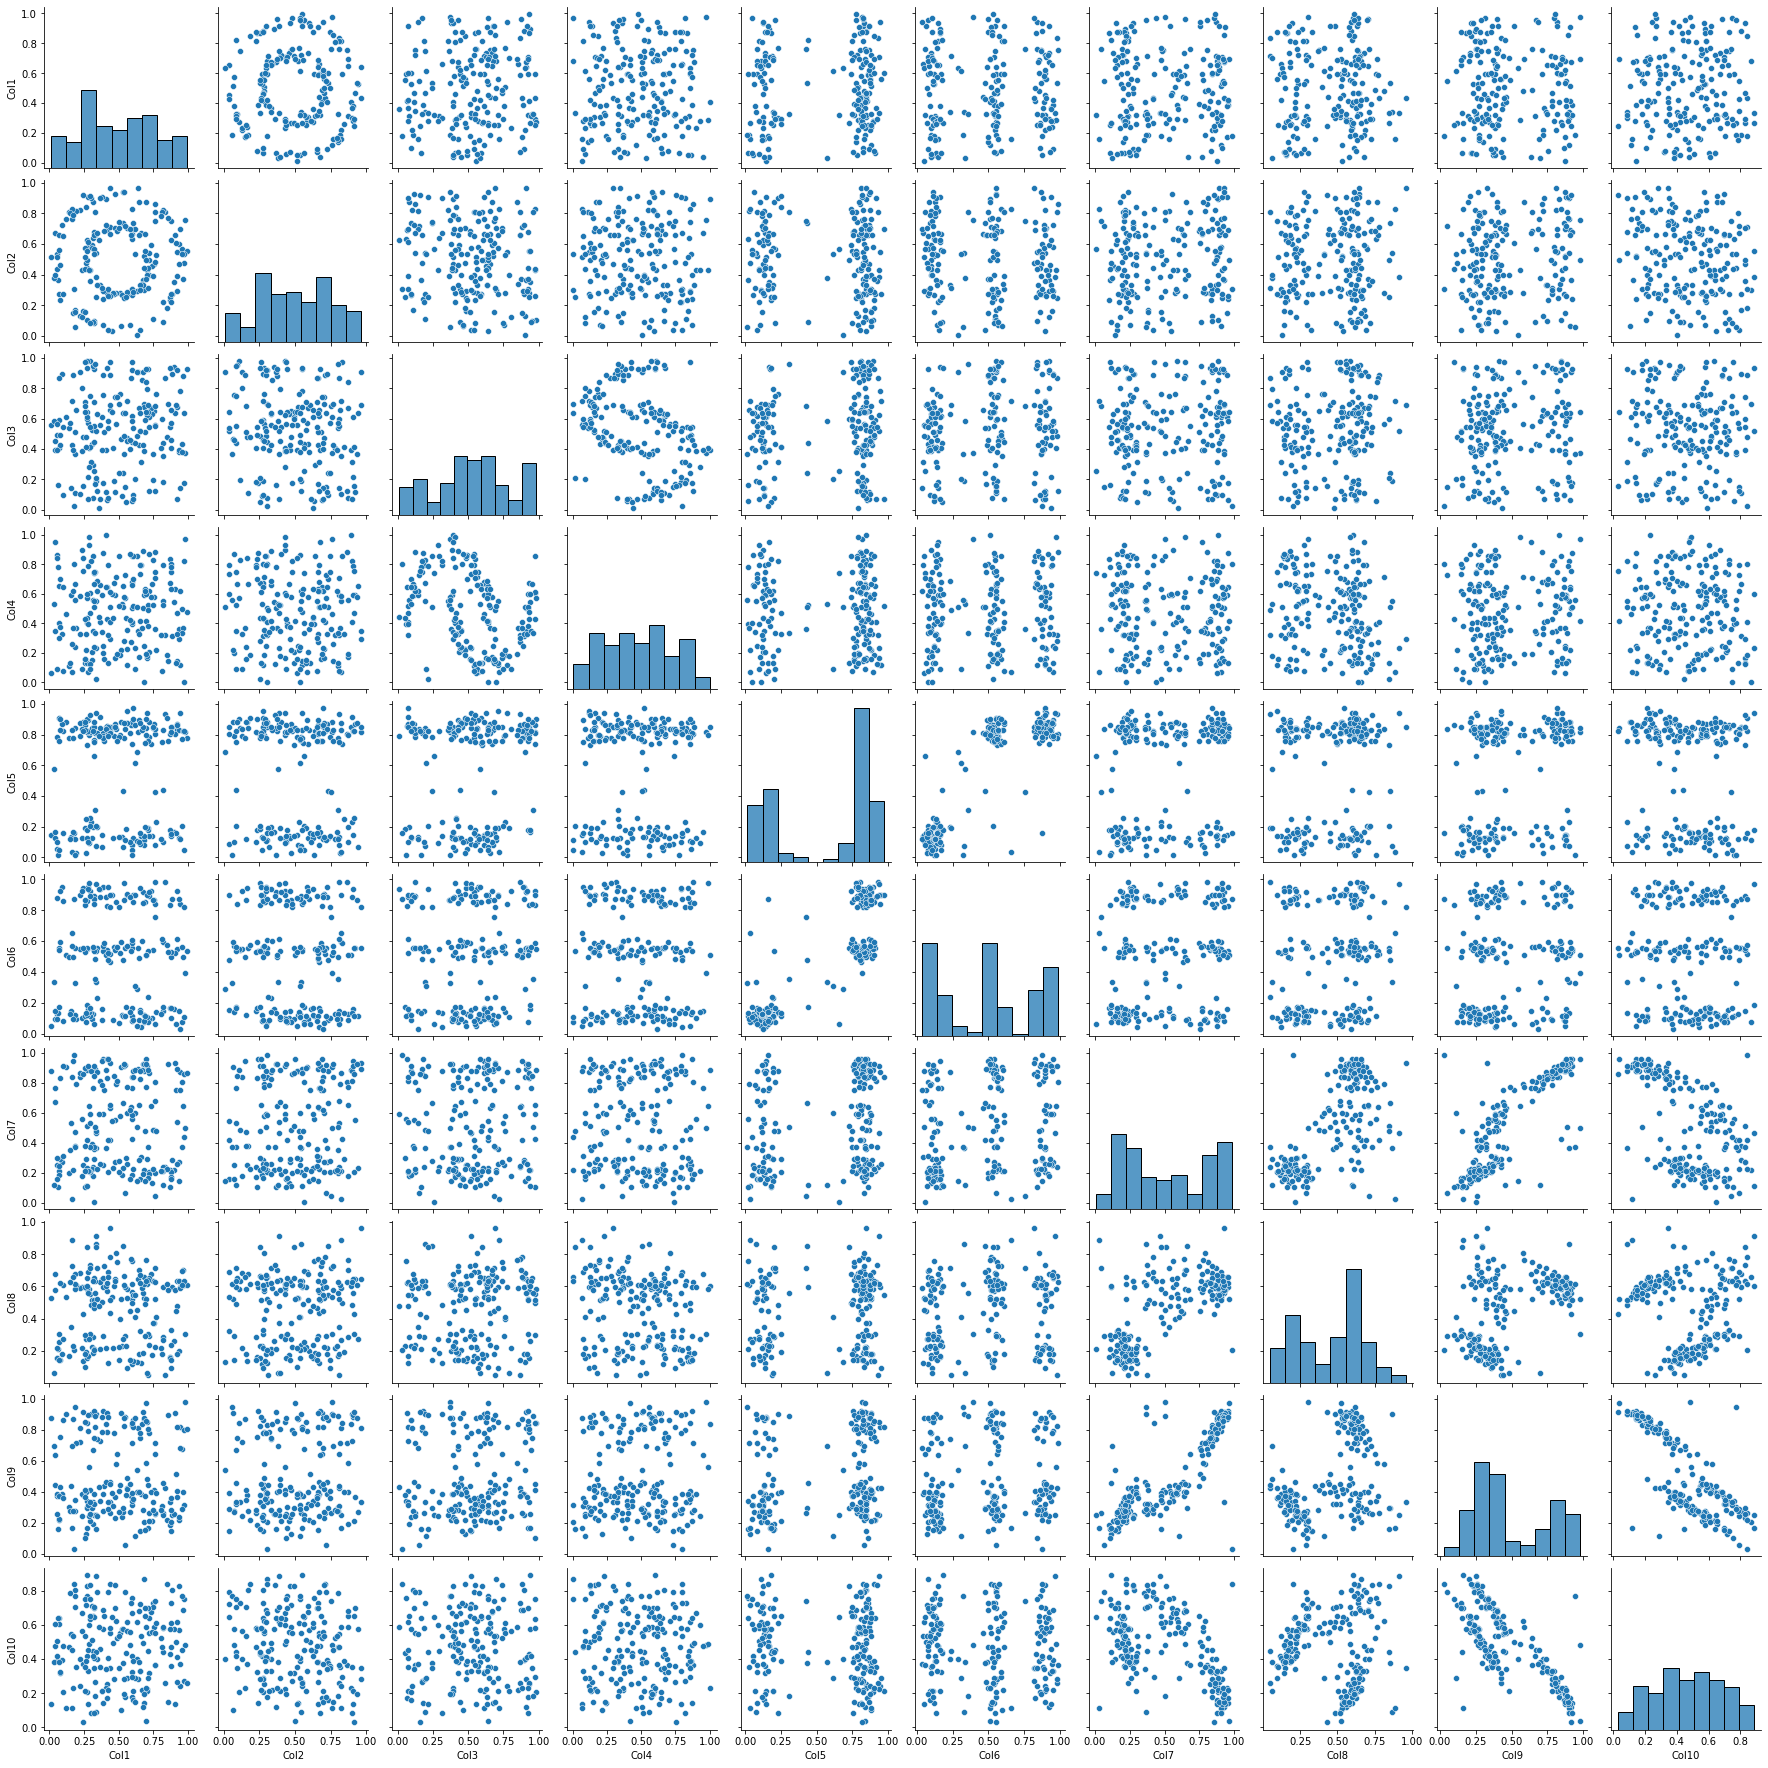

In [63]:
sns.pairplot(df.sample(frac=0.2))

In [69]:
df
df1 = df.melt('Col1', var_name= 'cols', value_name= 'vals')
df1

Col1      Col2      Col3      Col4      Col5      Col6      Col7  \
0    0.263995  0.764929  0.138424  0.935242  0.605867  0.518790  0.912225   
1    0.546092  0.653975  0.065575  0.227772  0.845269  0.837066  0.272379   
2    0.336714  0.538842  0.192801  0.553563  0.074515  0.332993  0.365792   
3    0.092108  0.995017  0.014465  0.176371  0.241530  0.514724  0.562208   
4    0.325261  0.805968  0.957033  0.331665  0.307923  0.355315  0.501899   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.305055  0.656837  0.331665  0.822525  0.907127  0.882276  0.855732   
996  0.812627  0.864258  0.616604  0.167966  0.811223  0.938071  0.418462   
997  0.250967  0.138627  0.919703  0.461234  0.886555  0.869888  0.800908   
998  0.502436  0.936820  0.580062  0.540773  0.151995  0.059452  0.225220   
999  0.457991  0.017755  0.714113  0.125992  0.063316  0.154739  0.922974   

         Col8      Col9     Col10  
0    0.608234  0.723782  0.733591  
1    0.331679  0.429297  0.367422  
2    0.861309  0.899017  0.088600  
3    0.158963  0.073715  0.208463  
4    0.558449  0.885169  0.182754  
..        ...       ...       ...  
995  0.584786  0.808640  0.242762  
996  0.472306  0.348347  0.671129  
997  0.530324  0.779433  0.234952  
998  0.242755  0.279385  0.538755  
999  0.692299  0.816777  0.307592  

[1000 rows x 10 columns]

Col1   cols      vals
0     0.263995   Col2  0.764929
1     0.546092   Col2  0.653975
2     0.336714   Col2  0.538842
3     0.092108   Col2  0.995017
4     0.325261   Col2  0.805968
...        ...    ...       ...
8995  0.305055  Col10  0.242762
8996  0.812627  Col10  0.671129
8997  0.250967  Col10  0.234952
8998  0.502436  Col10  0.538755
8999  0.457991  Col10  0.307592

[9000 rows x 3 columns]

In [70]:
#g = sns.factorplot(x= 'Col1', y= 'vals', hue= 'cols', data=df1.sample(frac=0.2))

https://www.analyticsvidhya.com/blog/2021/04/dealing-with-anomalies-in-the-data/